## Датасет собран из базы данных переписи 1994 года и содержит данные о доходах.
### Информация о данных:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, * Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

## Проведите анализ данных при помощи Pandas выполнив поставленные задачи.
#### 

In [1]:
import pandas as pd

In [2]:
# загружаем датасет
data = pd.read_csv("E:/innowiseHW/homework/pandas_numpy_tasks/data/adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Посчитайте, сколько мужчин и женщин (признак *sex*) представлено в этом датасете**

In [3]:
data['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

**2. Каков средний возраст мужчин (признак *age*) по всему датасету?**

In [4]:
data.groupby('sex')['age'].mean()['Male']

np.float64(39.43354749885268)

**3. Какова доля граждан Соединенных Штатов (признак *native-country*)?**

In [5]:
round((data['native-country'] == 'United-States').mean() * 100, 2)

np.float64(89.59)

**4-5. Рассчитайте среднее значение и среднеквадратичное отклонение возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год**

In [6]:
data.groupby('salary')['age'].agg(['mean'], 'std')

,mean
salary,
<=50K,36.783738
>50K,44.249841


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [7]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
high_salary = data[data['salary'] == '>50K']
high_salary_edu = (
    high_salary['education'].isin(higher_education).mean()
)

low_salary = data[data['salary'] == '<=50K']
low_salary_edu = (
    low_salary['education'].isin(higher_education).mean()
)

print(f"The people >50K with higher education {round(high_salary_edu * 100, 2)}%")
print(f"The people <=50K with higher education {round(low_salary_edu * 100, 2)}%")

The people >50K with higher education 57.84%
The people <=50K with higher education 24.19%


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Asian-Pac-Islander*.**

In [8]:
data.groupby(['race', 'sex'])['age'].describe()
# 90.0

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [9]:
men = data[data['sex'] == 'Male']
men['is_married'] = men['marital-status'].str.startswith('Married')
men.groupby('is_married')['salary'].apply(
    lambda x: (x== '>50K').mean()
)


C:\Users\ulugb\AppData\Local\Temp\ipykernel_12500\3049388627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['is_married'] = men['marital-status'].str.startswith('Married')


is_married
False    0.084495
True     0.440514
Name: salary, dtype: float64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [10]:
max_hours = data['hours-per-week'].max()
num_people = data[data['hours-per-week'] == max_hours].shape[0]
high_earners = data[(data['hours-per-week'] == max_hours) & (data['salary'] == '>50K')].shape[0]
percent_high_earners = (high_earners / num_people) * 100
print('The percent of high earners with maximum hours of work per week', round(percent_high_earners, 2))

The percent of high earners with maximum hours of work per week 29.41


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [11]:
data.groupby(['native-country', 'salary'])['hours-per-week'].mean()

native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64

**11.Сгруппируйте людей по возрастным группам *young*, *adult*, *retiree*, где:**
* *young* соответствует 16-35 лет
* *adult* - 35-70 лет
* *retiree* - 70-100 лет

**Проставьте название соответсвтуещей группы для каждого человека в новой колонке AgeGroup**

In [12]:
bins = [16, 35, 70, 100]
labels = ['young', 'adult', 'retiree']
data['age_groups'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

<Axes: >

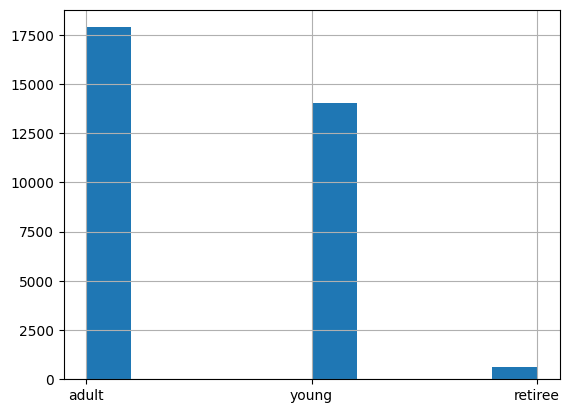

In [13]:
data['age_groups'].hist()

In [14]:
data[['age', 'age_groups']]

,age,age_groups
0,39,adult
1,50,adult
2,38,adult
3,53,adult
4,28,young
...,...,...
32556,27,young
32557,40,adult
32558,58,adult
32559,22,young


**12-13. Определите количество зарабатывающих >50K в каждой из возрастных групп (колонка AgeGroup), а также выведите название возрастной группы, в которой чаще зарабатывают больше 50К (>50K)**

In [15]:
data.groupby('age_groups')['salary'].value_counts()

C:\Users\ulugb\AppData\Local\Temp\ipykernel_12500\1790034749.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_groups')['salary'].value_counts()


age_groups  salary
young       <=50K     12561
            >50K       1488
adult       <=50K     11643
            >50K       6240
retiree     <=50K       516
            >50K        113
Name: count, dtype: int64

**14. Сгруппируйте людей по типу занятости (колонка occupation) и определите количество людей в каждой группе. После чего напишите функциюю фильтрации filter_func, которая будет возвращать только те группы, в которых средний возраст (колонка age) не больше 40 и в которых все работники отрабатывают более 5 часов в неделю (колонка hours-per-week)**

In [16]:
group_counts = data.groupby('occupation').size()
group_counts

occupation
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
dtype: int64

In [17]:
def filter_func(group):
    return (group['age'].mean() <= 40) and (group['hours-per-week'].min() > 5)

filtered_counts = data.groupby('occupation').filter(filter_func)
filtered_counts.groupby('occupation').size()

occupation
Armed-Forces    9
dtype: int64